In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# forecast rain 


In [2]:
df = pd.read_csv('dataset/data.csv')
df.shape

(4187, 22)

In [3]:
df['SUBDIVISION'].unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [4]:
X = df[['YEAR', 'SUBDIVISION']]
y = df['ANNUAL']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [6]:
cat_cols = ['SUBDIVISION']
num_cols = ['YEAR']

preprocessor = make_column_transformer(
    (OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

pipe = make_pipeline(preprocessor, RandomForestRegressor())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Score: ', pipe.score(X_test, y_test))

RMSE:  333.0467871123442
Score:  0.8721972413227992


In [7]:
# visualize
import plotly.express as px

fig = px.scatter(df, x='YEAR', y='ANNUAL', color='SUBDIVISION')
fig.show()

In [8]:
# VISUALIZE prediction
fig = px.scatter(df, x='YEAR', y='ANNUAL')
fig.add_scatter(x=X_test['YEAR'], y=y_pred, mode='markers', name='prediction',)
fig.show()

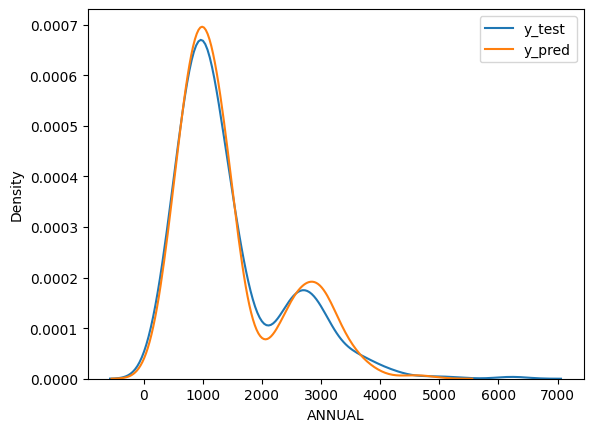

In [9]:
# kde ytest and ypred
import seaborn as sns
sns.kdeplot(y_test, label='y_test')
sns.kdeplot(y_pred, label='y_pred')
plt.legend()

In [10]:
import joblib

joblib.dump(pipe, 'model.joblib')

['model.joblib']

In [11]:
import pandas as pd
import joblib
def predict_rainfall(year, subdivision):
    model = joblib.load('model.joblib')
    df = pd.DataFrame({
        'YEAR': [year],
        'SUBDIVISION': [subdivision]
    })
    return model.predict(df)[0]


In [12]:
df['SUBDIVISION'].unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [13]:
predict_rainfall(2020, 'Kerala')

2808.880999999998